## Step 1: Exploratory Data Analysis (EDA)

In [179]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from statsmodels.api import formula
import statsmodels.formula.api as smf

In [12]:
# Loading the Dataset 
dataset = pd.read_csv("../datasets/Housing.csv") 
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
# Shape of the data
dataset.shape 

(545, 13)

In [14]:
# Summary Statistics 
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [15]:
# Confirm NULL Values 
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### A. Univariate Analysis 

- Univariate analysis of the target variable `Price` and the Predictors


Text(0.5, 0, 'House Price (Millions)')

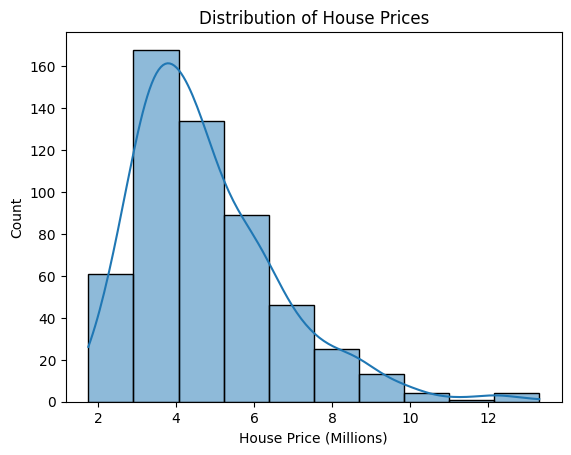

In [16]:
# Checking distribution/normality of the prices 

sns.histplot(data=dataset.price/1000000, bins=10, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("House Price (Millions)")


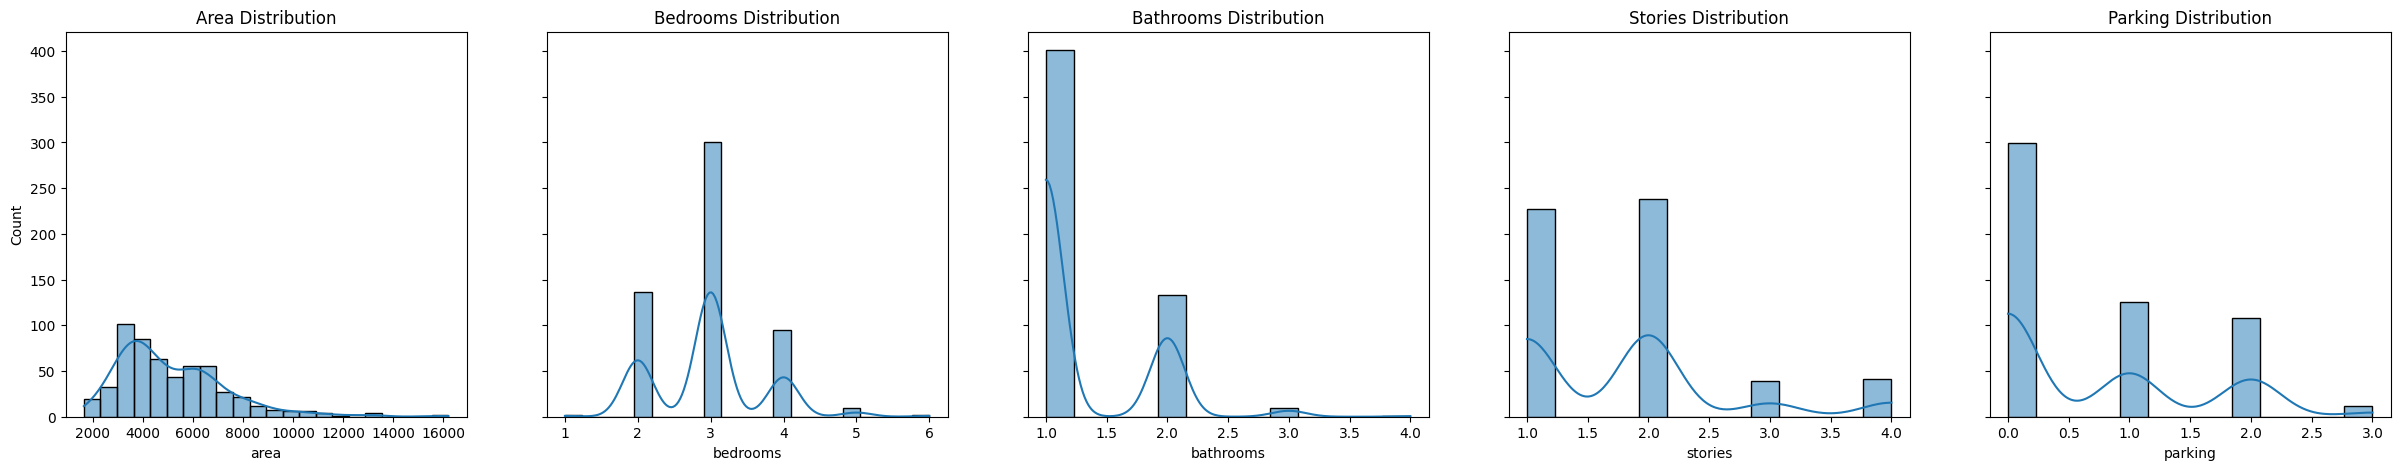

In [17]:
# Coninous Predictors 

# Extract continous predictors
numerical_predictors = dataset.select_dtypes(include=["int64"]) 

# Using Histograms to check distribution of continous predictors 
numerical_predictors = numerical_predictors.drop(columns=["price"]) 

# Extract the cols 
columns = list(numerical_predictors.columns) 

# Plot the histograms 
fig, ax = plt.subplots(1, 5, figsize=(30, 5), sharey=True) 
ax = ax.flatten() 

for index, column in enumerate(columns):
    sns.histplot(numerical_predictors[column], ax=ax[index], kde=True)
    ax[index].set_title(f"{column.capitalize()} Distribution")


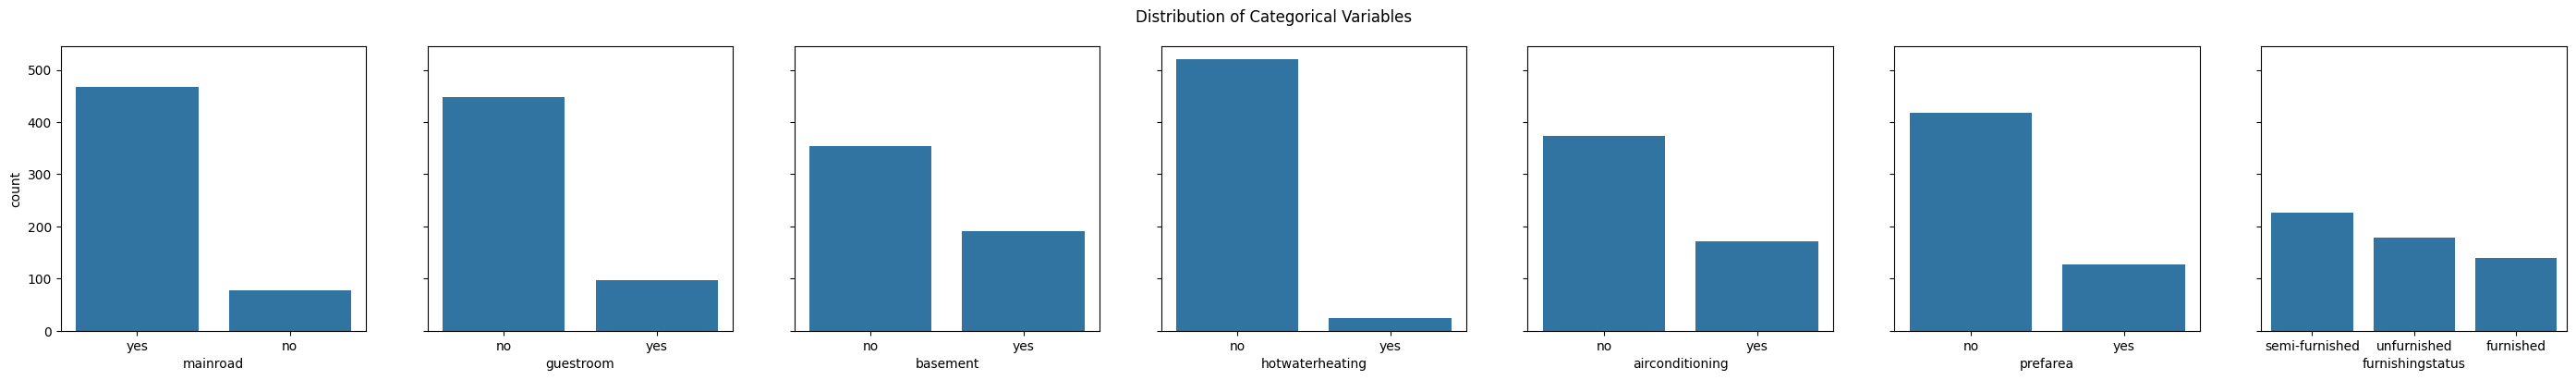

In [18]:
# Categorical variables 
categorical_predictors = dataset.select_dtypes(exclude="int64") 

# Plotting the distribution of Categorical Variables 
categorical_columns = categorical_predictors.columns 

# Plotting the predictors 
fig, ax = plt.subplots(1, 7, figsize=(35, 4), sharey=True) 
ax = ax.flatten() 

plt.suptitle("Distribution of Categorical Variables")

for index, categorical_column in enumerate(list(categorical_columns)):
    df = dataset[categorical_column].value_counts().reset_index() 
    sns.barplot(data=df, x=categorical_column, y="count", ax=ax[index])

#### B. Multivariate Analysis 

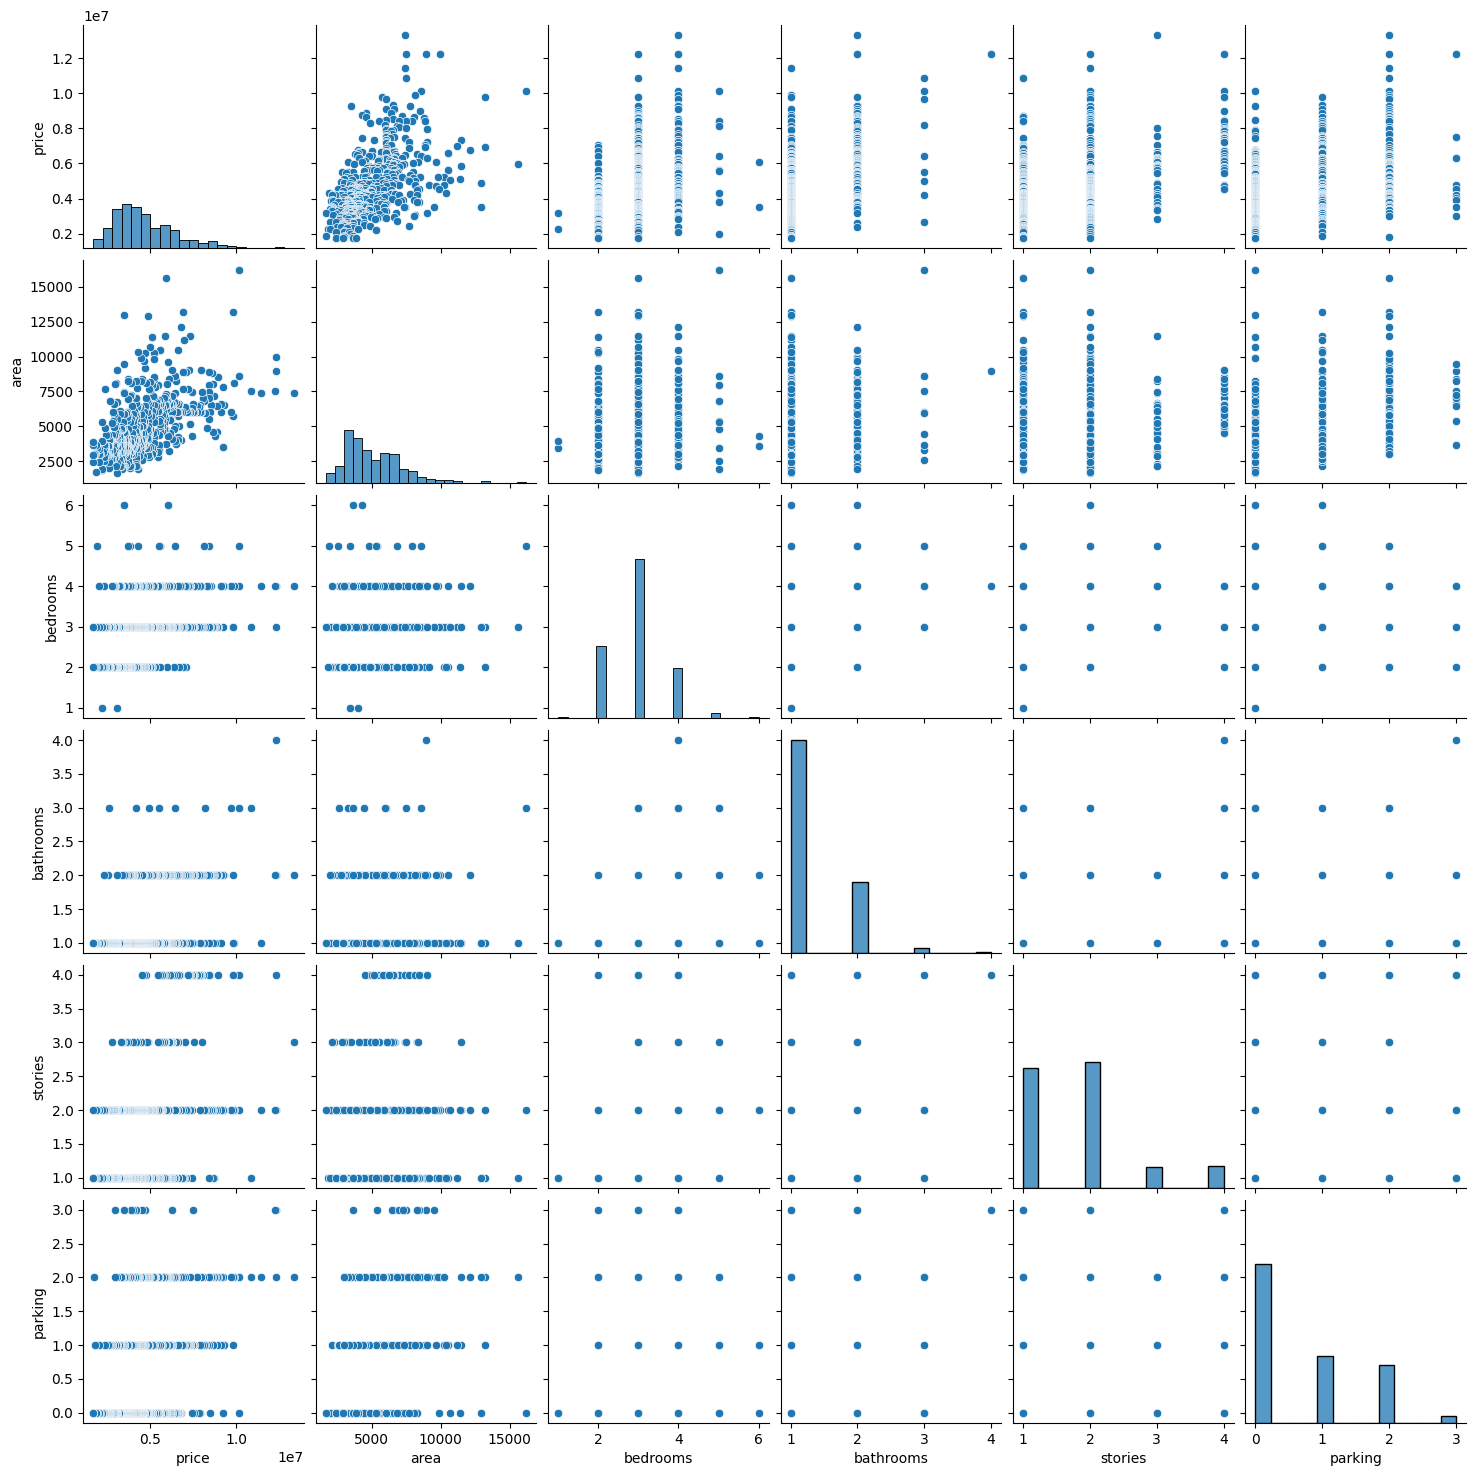

In [19]:
# Using a Pairplot
sns.pairplot(dataset)

<Axes: >

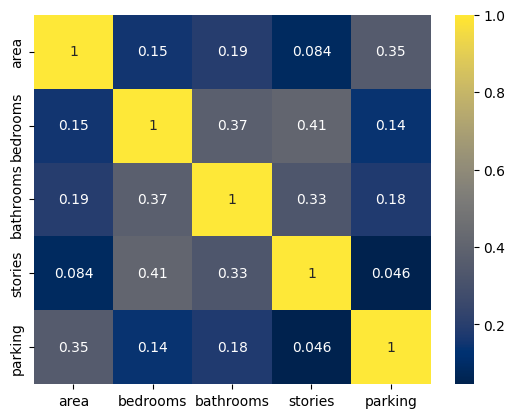

In [20]:
correlation_matrix = numerical_predictors.corr() 

sns.heatmap(correlation_matrix, annot=True, cmap="cividis")

In [105]:
# Data Encoding 
dataset_copy = dataset.copy() 

dataset.shape 

(545, 13)

In [108]:
# Get the Dummies 
dataset_dummies = pd.get_dummies(dataset, drop_first=True) 

dataset_dummies.columns = [column_name.replace(" ", "_").replace("-", "_") for column_name in dataset_dummies.columns]

dataset_dummies.shape 

(545, 14)

In [110]:
dataset_dummies.columns 

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi_furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [24]:
dataset_dummies.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


In [111]:
# Which Predictors has the greatest correlation with the target variable 
correlation_matrix = dataset_dummies.corr().abs()
correlation_matrix = correlation_matrix["price"].drop(index=["price"]).sort_values(ascending=False)
correlation_matrix

area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
furnishingstatus_unfurnished       0.280587
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi_furnished    0.063656
Name: price, dtype: float64

In [112]:
dataset_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi_furnished  545 non-null    b

In [113]:
# Converting the bool dtype to int 
bool_type_cols = dataset_dummies.select_dtypes(include="bool").columns
dataset_dummies[bool_type_cols] = dataset_dummies[bool_type_cols].astype("int")
dataset_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    int64
 7   guestroom_yes                    545 non-null    int64
 8   basement_yes                     545 non-null    int64
 9   hotwaterheating_yes              545 non-null    int64
 10  airconditioning_yes              545 non-null    int64
 11  prefarea_yes                     545 non-null    int64
 12  furnishingstatus_semi_furnished  545 non-null    i

In [114]:
# Checking for multicolinearity 
predictors_df = dataset_dummies.drop(columns=["price"])

multi_colinearity_df = predictors_df.corr().abs().unstack().reset_index()
multi_colinearity_df.columns = ["feature_1", "feature_2", "colleration"]
multi_colinearity_df = multi_colinearity_df.sort_values(by="colleration", ascending=False)

# Remove Perfeect Correlation between features 
multi_colinearity_df = multi_colinearity_df[multi_colinearity_df.colleration < 1]
multi_colinearity_df.head(10)


,feature_1,feature_2,colleration
155,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,0.588405
167,furnishingstatus_unfurnished,furnishingstatus_semi_furnished,0.588405
16,bedrooms,stories,0.408564
40,stories,bedrooms,0.408564
27,bathrooms,bedrooms,0.373930
15,bedrooms,bathrooms,0.373930
97,basement_yes,guestroom_yes,0.372066
85,guestroom_yes,basement_yes,0.372066
4,area,parking,0.352980
52,parking,area,0.352980


In [ ]:
# A multicolinearity of around 0.5 is okay to continue with model building without such features 
# causing major problems to the model. 

### Step 2: Model Building 


#### - 1. LinearRegression()

In [115]:
# Model 1: Linear Regression 
dataset_dummies.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [116]:
# Split the data 
X = dataset_dummies.drop(columns=["price"])
y = dataset_dummies["price"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [117]:
# Fit the model 
linear_model = LinearRegression().fit(X_train, y_train) 

# Make predictions and evaluate 
y_predicted = linear_model.predict(X_test) 

print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_predicted)}\nR2 Score: {metrics.r2_score(y_test, y_predicted)}")

RMSE: 1324506.9600914388
R2 Score: 0.6529242642153184


In [118]:
# Let's see if dropping some less important features will improve our model 
# Consideration predictors with a correlation of 3+
correlation_matrix


area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
furnishingstatus_unfurnished       0.280587
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi_furnished    0.063656
Name: price, dtype: float64

In [119]:
significant_correlations = correlation_matrix[correlation_matrix.values >= 0.5]
significant_features = [index_name for index_name in significant_correlations.index] 

significant_features

['area', 'bathrooms']

In [121]:
# Retrain the model 
linear_model_2 = LinearRegression().fit(X_train[significant_features], y_train) 

# Make predictions and evaluate 
y_predicted_2 = linear_model_2.predict(X_test[significant_features]) 

print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_predicted_2)}\nR2 Score: {metrics.r2_score(y_test, y_predicted_2)}")

RMSE: 1698621.0623827956
R2 Score: 0.4291673924903032


In [168]:
# Since the performance has not improved, let's consider scaling the features and put them on 
# the same scale, that is, considering that area has a very high magnitude compared to other 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build back the dataframes 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[column for column in X_train.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[column for column in X_test.columns])

In [169]:
linear_model_3 = LinearRegression().fit(X_train_scaled, y_train)
y_predicted_3 = linear_model_3.predict(X_test_scaled)
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_predicted_3)}\nR2 Score: {metrics.r2_score(y_test, y_predicted_3)}")


RMSE: 1324506.9600914402
R2 Score: 0.6529242642153176


In [ ]:
# A Linear Regression Model has performaed poorly overall.
# It has a big error missing predictions by 1.3M and only explaining 65% of the model variance.

##### 2. Model - OLS

In [124]:
# Extracting Predictor Variables 
predictor_variables = [column for column in dataset_dummies.columns if column != "price"] 
target_variable = "price" 

# Building the formular string 
formular_string = target_variable + " ~ " + "+".join(predictor_variables)

In [126]:
# Buidlding the model 
ols_model = smf.ols(formula=formular_string, data=dataset_dummies)
ols_model_fitted = ols_model.fit()

In [127]:
# Evaluate the Summary Results 
summary_results = ols_model_fitted.summary()
print(summary_results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 28 Nov 2025   Prob (F-statistic):          9.07e-123
Time:                        14:44:00   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# The results suggests that our model suffers from multicolinearity
# After studying the p_values, 

ols_pvalues = np.round(ols_model_fitted.pvalues, 4)
ols_pvalues

Intercept                          0.8715
area                               0.0000
bedrooms                           0.1144
bathrooms                          0.0000
stories                            0.0000
parking                            0.0000
mainroad_yes                       0.0032
guestroom_yes                      0.0229
basement_yes                       0.0016
hotwaterheating_yes                0.0001
airconditioning_yes                0.0000
prefarea_yes                       0.0000
furnishingstatus_semi_furnished    0.6911
furnishingstatus_unfurnished       0.0012
dtype: float64

In [139]:
# Considering significanat predictors and fitting the model again 
significant_features_ols = ols_pvalues[ols_pvalues < 0.05]

predictor_variables_2 = [index_name for index_name in significant_features_ols.index]

formular_string_2 = target_variable + " ~ " + "+".join(predictor_variables_2) 
formular_string_2

'price ~ area+bathrooms+stories+parking+mainroad_yes+guestroom_yes+basement_yes+hotwaterheating_yes+airconditioning_yes+prefarea_yes+furnishingstatus_unfurnished'

In [140]:
ols_model_2 = smf.ols(formula=formular_string_2, data=dataset_dummies) 
ols_model_2_fitted = ols_model_2.fit() 

In [141]:
summary_results_2 = ols_model_2_fitted.summary() 
print(summary_results_2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     103.1
Date:                Fri, 28 Nov 2025   Prob (F-statistic):          3.24e-124
Time:                        14:56:10   Log-Likelihood:                -8332.9
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     533   BIC:                         1.674e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [142]:
# The model is still suffering from multi-colineraity 
# The model R Score is also moderate, only explaining about 68% of the variances.

In [144]:
# We may need to study the residuals and see what they tell us about our model 

Text(0.5, 1.0, 'Residuals vs.Fitted Values')

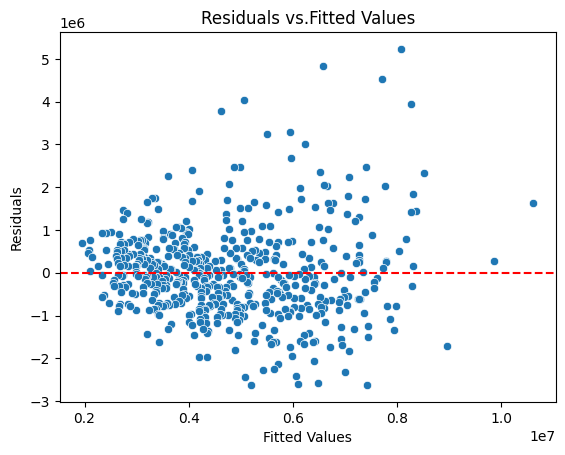

In [ ]:
# Testing the Constance Variance of the residuals (HETEROSCEDASTICITY)
sns.scatterplot(x=ols_model_2_fitted.fittedvalues, y=ols_model_2_fitted.resid)
plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.title("Residuals vs.Fitted Values")

In [147]:
# The scatter plot reveals that, the model suffers severe heterskedasticity. 
# Looking at the plot, for low fitted values, the residuals tend to cluster around 0. 
# However, as the fitted values increase, the residuals begin to spread dramatically (the variance begin to increase) suggesting Heteroscedasticity
# We can therefore not rely on this model. The errors are very high and less reliable when predicting houses with larger prices (expensive houses) than houses with cheaper prices

##### 3. Ensemble Methods - Bagging, Boosting, & Stacking 
##### #- RandomForestRegressor()


In [ ]:
# Let's test whether ensemble methods will have better results 
# We shall test;
# 1. RandomForests 
# 2. 

In [162]:
# RandomForests()
forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [163]:
# Evaluating the performance 
y_predicted_forest = forest_model.predict(X_test) 
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_predicted_forest)}\nR2 Score: {metrics.r2_score(y_test, y_predicted_forest)}")

RMSE: 1398115.6668385956
R2 Score: 0.6132752494107068


In [170]:
# Fitting the Forest model using scaled features 
forest_model.fit(X_train_scaled, y_train) 
y_predicted_forest_2 = forest_model.predict(X_test_scaled)
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_predicted_forest_2)}\nR2 Score: {metrics.r2_score(y_test, y_predicted_forest_2)}")

RMSE: 1397569.4674715274
R2 Score: 0.6135773525325263


##### #- StackingRegressor()

In [180]:
# StackingRegressor()

base_learners = [
    ("linear_model", LinearRegression()),
    ("random_forest", forest_model),
    ("ridge", RidgeCV())
]

meta_learner = GradientBoostingRegressor()

In [181]:
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)


,estimators,"[('linear_model', ...), ('random_forest', ...), ...]"
,final_estimator,GradientBoostingRegressor()
,cv,5
,n_jobs,None
,passthrough,False
,verbose,0
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [183]:
# Evaluating the performance 
y_predicted_stacking = stacking_model.predict(X_test) 
print(f"RMSE: {metrics.root_mean_squared_error(y_test, y_predicted_stacking)}\nR2 Score: {metrics.r2_score(y_test, y_predicted_stacking)}")

RMSE: 1335536.2669156168
R2 Score: 0.64711992646032


In [ ]:
# Most of these models performed similarly with an averrage score of 65. However, OLS model appears to be the best model with a R2 Score of 68%. 
# Errors accross the models remained large at around 1.3M units 